# Game Scores Dataset
**Dataset Description：**
data for each team from the 2017-18 season all the way to this year's 2022-23 season for each game played by each team.

With this data set you can use the last six season's worth of games (over 7000) and predict game outcomes, visualize team performance's, compare home and away performance's, etc.

Data parsed using Swar Patel's nba_api for which documentation can be found here: https://github.com/swar/nba_api

columns:
* "MATCHID" : nba's game id
* "DATE" : date
* "SEASON" : season
* "HOME" : home team
* "AWAY" : away team
* "W_HOME" : 1 if home team won, "W_AWAY" : 1 if away team won
* "HOME_FG" : Home team's fg made, "AWAY_FG" : Away team's fg made
* "HOME_FGA" : Home team's fg attempted, "AWAY_FGA" : Away team's fg attempted
* "HOME_FG_PCT" : Home team's fg %, "AWAY_FG_PCT" : Away team's fg %
* "HOME_FG3" : Home team's 3 pointers made, "AWAY_FG3" : Away team's 3 pointers made
* "HOME_FG3A" : Home team's 3 pointers attempted, "AWAY_FG3A" : Away team's 3 pointers attempted
* "HOME_FG3_PCT" : Home team's 3pt fg%, "AWAY_FG3_PCT" : Away team's 3pt fg%
* "HOME_FT" : Home team's ft made, "AWAY_FT" : Away team's ft made
* "HOME_FTA" : Home team's ft attempted, "AWAY_FTA" : Away team's ft attempted
* "HOME_FT_PCT" : Home team's ft %, "AWAY_FT_PCT" : Away team's ft %
* "HOME_OFF_REB" : Home team's offensive reb's, "AWAY_OFF_REB" : Away team's offensive reb's
* "HOME_DEF_REB" : Home team's defensive reb's, "AWAY_DEF_REB" : Away team's defensive reb's
* "HOME_TOT_REB" : Home team's total reb's, "AWAY_TOT_REB" : Away team's total rebs
* "HOME_AST" : Home team's assists, "AWAY_AST" : Away team's assists
* "HOME_STL" : Home team's steals, "AWAY_STL" : Away team's steals
* "HOME_TURNOVERS" : Home team's total turnovers, "AWAY_TURNOVERS" : Away team's total turnovers
* "HOME_BLK": Home team's blocks, "AWAY_BLK" : Away team's blocks
* "HOME_PTS" : Home team's points scored, "AWAY_PTS" : Away team's points scored

## Package Importing

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset and Clean Dataset

In [19]:
data = pd.read_csv('./data/game_scores.csv')
data.head()

,Unnamed: 0,MATCHID,DATE,SEASON,HOME,AWAY,W_HOME,W_AWAY,HOME_FG,AWAY_FG,...,HOME_AST,AWAY_AST,HOME_STL,AWAY_STL,HOME_TURNOVERS,AWAY_TURNOVERS,HOME_BLK,AWAY_BLK,HOME_PTS,AWAY_PTS
0,0,21701214,04/10/2018,2017-18,Hawks,76ers,0,1,41,43,...,27,29,10,7,10,18,3,8,113,121
1,1,21701202,04/08/2018,2017-18,Celtics,Hawks,0,1,42,43,...,33,23,9,7,12,13,6,4,106,112
2,2,21701184,04/06/2018,2017-18,Wizards,Hawks,0,1,35,38,...,18,24,8,5,12,18,4,5,97,103
3,3,21701172,04/04/2018,2017-18,Hawks,Heat,0,1,33,42,...,20,23,5,9,16,12,6,10,86,115
4,4,21701158,04/03/2018,2017-18,Heat,Hawks,1,0,41,37,...,22,24,10,10,14,18,8,1,101,98


In [20]:
data.drop(columns = ['Unnamed: 0'], inplace= True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATCHID         7059 non-null   int64  
 1   DATE            7059 non-null   object 
 2   SEASON          7059 non-null   object 
 3   HOME            7059 non-null   object 
 4   AWAY            7059 non-null   object 
 5   W_HOME          7059 non-null   int64  
 6   W_AWAY          7059 non-null   int64  
 7   HOME_FG         7059 non-null   int64  
 8   AWAY_FG         7059 non-null   int64  
 9   HOME_FGA        7059 non-null   int64  
 10  AWAY_FGA        7059 non-null   int64  
 11  HOME_FG_PCT     7059 non-null   float64
 12  AWAY_FG_PCT     7059 non-null   float64
 13  HOME_FG3        7059 non-null   int64  
 14  AWAY_FG3        7059 non-null   int64  
 15  HOME_FG3A       7059 non-null   int64  
 16  AWAY_FG3A       7059 non-null   int64  
 17  HOME_FG3_PCT    7059 non-null   f

## Cleaning the dataset by removing abnormal data points, filling in missing values and removing unnecessary columns

In [22]:
# using relevant features
data = data[['W_HOME', 'HOME_FG', 'AWAY_FG', 'HOME_FG3', 'AWAY_FG3', 'HOME_FT', 'AWAY_FT', 'HOME_STL', 'AWAY_STL', 'HOME_BLK', 'AWAY_BLK']]

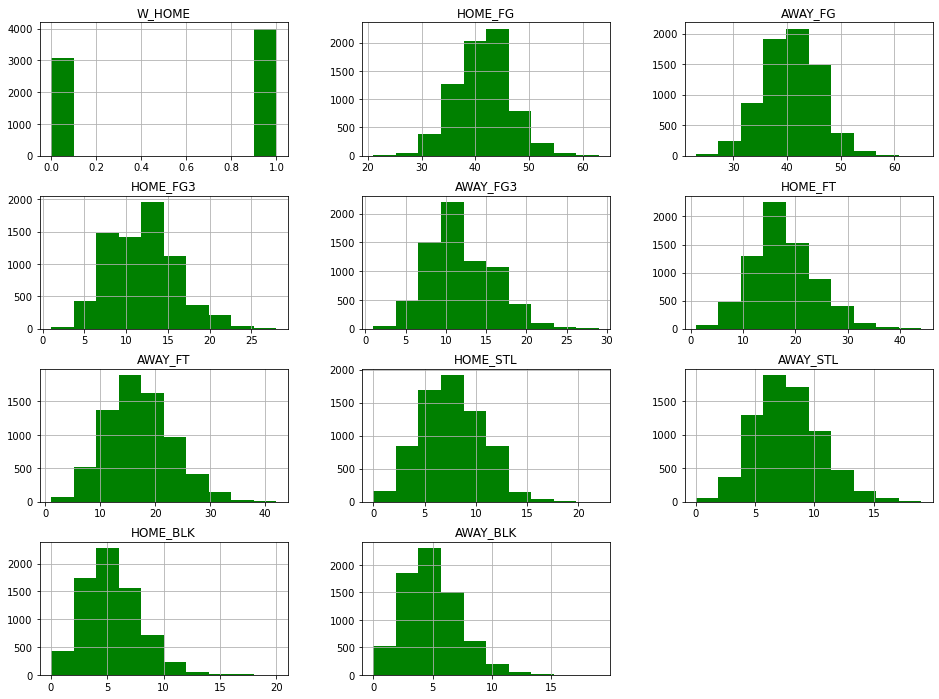

In [23]:
data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

In [24]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W_HOME,7059.0,0.565944,0.495667,0.0,0.0,1.0,1.0,1.0
HOME_FG,7059.0,41.224536,5.210381,21.0,38.0,41.0,45.0,63.0
AWAY_FG,7059.0,40.551495,5.177058,23.0,37.0,40.0,44.0,65.0
HOME_FG3,7059.0,12.023516,3.899962,1.0,9.0,12.0,14.0,28.0
AWAY_FG3,7059.0,11.777022,3.855403,1.0,9.0,12.0,14.0,29.0
HOME_FT,7059.0,17.633234,6.013697,1.0,13.0,17.0,22.0,44.0
AWAY_FT,7059.0,17.184445,5.827377,1.0,13.0,17.0,21.0,42.0
HOME_STL,7059.0,7.535487,2.906444,0.0,5.0,7.0,9.0,22.0
AWAY_STL,7059.0,7.625726,2.893284,0.0,6.0,7.0,9.0,19.0
HOME_BLK,7059.0,4.933843,2.503274,0.0,3.0,5.0,6.0,20.0


In [25]:
data.dtypes

W_HOME      int64
HOME_FG     int64
AWAY_FG     int64
HOME_FG3    int64
AWAY_FG3    int64
HOME_FT     int64
AWAY_FT     int64
HOME_STL    int64
AWAY_STL    int64
HOME_BLK    int64
AWAY_BLK    int64
dtype: object

In [26]:
for column in data.select_dtypes(exclude='object'):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > 3][column]
    data[column][outliers.index] = np.nan

In [27]:
data = data.dropna()
data

,W_HOME,HOME_FG,AWAY_FG,HOME_FG3,AWAY_FG3,HOME_FT,AWAY_FT,HOME_STL,AWAY_STL,HOME_BLK,AWAY_BLK
0,0.0,41.0,43.0,13.0,17.0,18.0,18.0,10.0,7.0,3.0,8.0
1,0.0,42.0,43.0,9.0,15.0,13.0,11.0,9.0,7.0,6.0,4.0
2,0.0,35.0,38.0,9.0,11.0,18.0,16.0,8.0,5.0,4.0,5.0
3,0.0,33.0,42.0,9.0,17.0,11.0,14.0,5.0,9.0,6.0,10.0
4,1.0,41.0,37.0,8.0,13.0,11.0,11.0,10.0,10.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7054,1.0,44.0,36.0,10.0,8.0,22.0,19.0,7.0,6.0,7.0,1.0
7055,0.0,40.0,43.0,7.0,8.0,16.0,19.0,5.0,11.0,4.0,9.0
7056,1.0,43.0,42.0,13.0,3.0,18.0,19.0,8.0,12.0,3.0,3.0
7057,1.0,44.0,40.0,14.0,9.0,16.0,23.0,7.0,16.0,3.0,2.0


In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W_HOME,6760.0,0.567899,0.495405,0.0,0.0,1.0,1.00,1.0
HOME_FG,6760.0,41.178846,5.087179,26.0,38.0,41.0,45.00,56.0
AWAY_FG,6760.0,40.508728,5.068250,26.0,37.0,40.0,44.00,56.0
HOME_FG3,6760.0,11.974260,3.806410,1.0,9.0,12.0,14.00,23.0
AWAY_FG3,6760.0,11.739349,3.759345,1.0,9.0,12.0,14.00,23.0
HOME_FT,6760.0,17.566420,5.864679,1.0,13.0,17.0,21.25,35.0
AWAY_FT,6760.0,17.098817,5.707264,1.0,13.0,17.0,21.00,34.0
HOME_STL,6760.0,7.486391,2.845812,0.0,5.0,7.0,9.00,16.0
AWAY_STL,6760.0,7.600000,2.849128,0.0,6.0,7.0,9.00,16.0
HOME_BLK,6760.0,4.873964,2.389707,0.0,3.0,5.0,6.00,12.0


## To identify relevant features plot heatmap

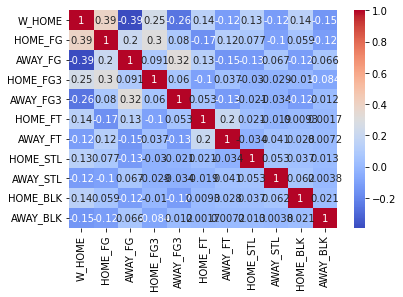

In [29]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [30]:
# List of features with a correlation to W_HOME of 0.2 and above
corr_matrix = data.corr()['W_HOME']
relevant_features = corr_matrix[(np.abs(corr_matrix) > 0.2)].index
relevant_features

Index(['W_HOME', 'HOME_FG', 'AWAY_FG', 'HOME_FG3', 'AWAY_FG3'], dtype='object')

## Data Preprocessing

### Dataset Classification

In [31]:
print(data['W_HOME'].value_counts())

1.0    3839
0.0    2921
Name: W_HOME, dtype: int64


In [32]:
#Training, Validation and Testing set splits
x_ex1 = data.copy().drop(columns=['W_HOME', 'AWAY_BLK','HOME_BLK', 'AWAY_STL', 'HOME_STL', 'AWAY_FT', 'HOME_FT'])
y_ex1 = data.copy()['W_HOME']
x_ex1_array = x_ex1.values
y_ex1_array = y_ex1.values
x_ex1_train = x_ex1_array[0:int((len(y_ex1_array)+1)*0.9),:]
x_ex1_test = x_ex1_array[int((len(y_ex1_array)+1)*0.9):,:]
y_ex1_train = y_ex1_array[0:int((len(y_ex1_array)+1)*0.9)]
y_ex1_test = y_ex1_array[int((len(y_ex1_array)+1)*0.9):]

## Data Normalisation

In [33]:
#Normalise dataset due to large value discrepancies
scaler = StandardScaler()

standardized_x_train = scaler.fit_transform(x_ex1_train)
standardized_x_test = scaler.transform(x_ex1_test)

## Model Evaluation

### Logistic Regression Model

In [34]:
model_log = LogisticRegression()

scores = cross_val_score(model_log, standardized_x_train, y_ex1_train, cv=9)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model_log.fit(standardized_x_train, y_ex1_train)
y_ex1_pred = model_log.predict(standardized_x_test)

Accuracy: 0.81 (+/- 0.02)


### Evaluation

In [35]:
x_ex1_test.shape

(676, 4)

In [36]:
y_ex1_pred = model_log.predict(standardized_x_test)

mse = mean_squared_error(y_ex1_test, y_ex1_pred)
r2 = r2_score(y_ex1_test, y_ex1_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.1760355029585799
R-squared (R2): 0.2868439716312057


As the MSE value is close to 0, the model has a low error when predicting values. however the low r2 value shows that there is very little correlation between the variables.